<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# Musterlösung / Sample solution 
## 6th exercise: <font color="#C70039">Domain Adaption with Autoencoders</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Date:   08.08.2023

---------------------------------

### Description 
This is one implementation example to demo the image reconstruction using autoencoders for domain adaption. 
PLease do not miss to try different optimizers and losses.

---------------------------------

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
import os
from   tqdm import tqdm
import time

SIZE=256

In [11]:
# import input img
input_img_data=[]
input_path = './data/heisenberg_heisenberg/gernot/'
files=os.listdir(input_path)
# read all images in the folder (different rotations and flips of the original)
for i in tqdm(files):
    try:
        img=cv2.imread(input_path+'/'+i,1)   #Change 0 to 1 for color images
        img=cv2.resize(img,(SIZE, SIZE))
        input_img_data.append(img_to_array(img))
    except: 
        pass
# -----------------------------------------  
# import output_img
output_img_data=[]
output_path = './data/heisenberg_heisenberg/walter/'
files=os.listdir(output_path)
# read all images in the folder (same rotations and flips as img)
for i in tqdm(files):
    try:
        img=cv2.imread(output_path+'/'+i,1)  #Change 0 to 1 for color images
        img=cv2.resize(img,(SIZE, SIZE))
        output_img_data.append(img_to_array(img))
    except: 
        pass

input_img_array = np.reshape(input_img_data, (len(input_img_data), SIZE, SIZE, 3))
input_img_array = input_img_array.astype('float32') / 255. # normalize
output_img_array= np.reshape(output_img_data, (len(output_img_data), SIZE, SIZE, 3))
output_img_array = output_img_array.astype('float32') / 255. # normalize

# Original image for prediction of output_img 
# this one does not belong to the training set
test_img_data=[]

test_img=cv2.imread('./data/heisenberg_heisenberg/gernot-heisenberg-original.jpg', 1)   #Change 0 to 1 for color images
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)#Changing BGR to RGB to show images in true colors
test_img=cv2.resize(test_img,(SIZE, SIZE))
test_img_data.append(img_to_array(test_img))

test_img_array = np.reshape(test_img_data, (len(test_img_data), SIZE, SIZE, 3))
test_img_array = test_img_array.astype('float32') / 255. # normalize

# set the start time
# later needed for calculating the computation time
start=time.time()

100%|██████████████████████████████████████████| 51/51 [00:00<00:00, 937.99it/s]


## Build the autoencoder-decoder model

In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 8)       

In [14]:
#callbacks = [tf.keras.callbacks.TensorBoard(log_dir='einstein_logs')]

# fit the model of input_img to output_img 
epochs = 50
model.fit(input_img_array, output_img_array, epochs=epochs, shuffle=True)#, callbacks=callbacks)

# print out the computation time
finish=time.time()
print('total computation time = ', finish-start)

# save the model
model.save("domain_adapt_autoenc_epochs." + str(epochs) + ".model")

Epoch 1/50
2/2 [==============================] - 2s 454ms/step - loss: 0.1472 - accuracy: 0.0643
Epoch 2/50
2/2 [==============================] - 1s 449ms/step - loss: 0.1249 - accuracy: 0.0808
Epoch 3/50
2/2 [==============================] - 1s 420ms/step - loss: 0.1054 - accuracy: 0.4070
Epoch 4/50
2/2 [==============================] - 1s 482ms/step - loss: 0.1019 - accuracy: 0.9457
Epoch 5/50
2/2 [==============================] - 1s 454ms/step - loss: 0.0902 - accuracy: 0.9567
Epoch 6/50
2/2 [==============================] - 1s 510ms/step - loss: 0.0806 - accuracy: 0.9567
Epoch 7/50
2/2 [==============================] - 1s 525ms/step - loss: 0.0765 - accuracy: 0.9564
Epoch 8/50
2/2 [==============================] - 1s 518ms/step - loss: 0.0733 - accuracy: 0.9548
Epoch 9/50
2/2 [==============================] - 1s 492ms/step - loss: 0.0732 - accuracy: 0.9441
Epoch 10/50
2/2 [==============================] - 1s 508ms/step - loss: 0.0724 - accuracy: 0.9250
Epoch 11/50
2/2 [==

2023-11-05 15:00:10.298492: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,?,?]
	 [[{{node inputs}}]]
2023-11-05 15:00:10.312059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,?,?]
	 [[{{node inputs}}]]
2023-11-05 15:00:10.324532: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,?,?]
	 [[{{node inputs}}]]
2023-11-05

INFO:tensorflow:Assets written to: domain_adapt_autoenc_epochs.50.model/assets


INFO:tensorflow:Assets written to: domain_adapt_autoenc_epochs.50.model/assets


output of test image
1/1 [==============================] - 0s 59ms/step


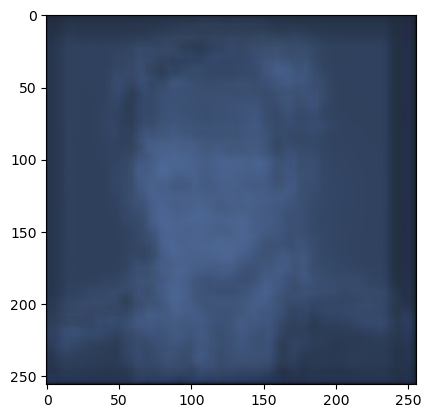

In [15]:
# predict the original image as test image, 
# since it did not belong to the training data.
# if the domain was really adapted, then the result would look like output_img
print("output of test image")
pred = model.predict(test_img_array)
plt.imshow(pred[0])
plt.show()